In [67]:
#Se crea una estructura de un dataframe para cargar los datos
import pandas as pd   
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 

In [68]:
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
temp = pd.read_csv("/UCordoba/Machine Learning/Data/body_temp.csv")
#se muestra el dataframe
temp

,age,gender,body_temp,target
0,64,0,35.72,0
1,21,0,35.94,0
2,55,0,36.06,0
3,64,0,36.11,0
4,55,0,36.17,0
...,...,...,...,...
341,50,0,38.10,1
342,56,0,38.15,1
343,70,0,37.92,1
344,60,0,37.64,1


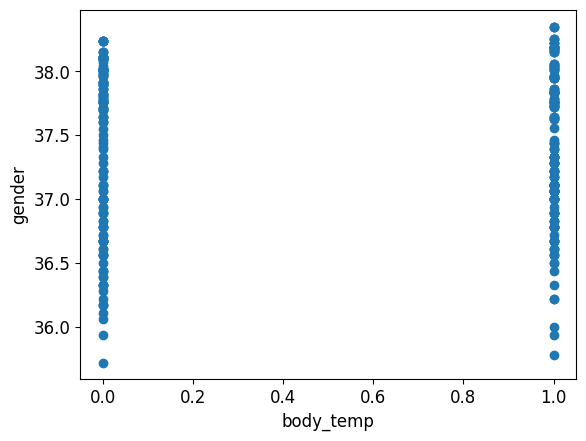

In [69]:
#Se visualiza en una gráfico de dispersión presencia de arañas y tamaño de los granos de arena
import matplotlib.pyplot as plott
%matplotlib inline
plott.ylabel('gender')
plott.xlabel('body_temp')
plott.scatter(temp['gender'],temp['body_temp'])

In [6]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
temp.columns=temp.columns.str.strip()

In [70]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
#inputs_X=dfNetwork.drop('src_ip', axis='columns')
# Se elimina la columna id, debido a que no es relevante
#inputs_X=dfNetwork.drop('dst_ip', axis='columns')

In [71]:
#En X se separan las variables independientes, en este caso el tamo de los granos de arena
#X= dfNetwork[['src_port','dst_port','bidirectional_first_seen_ms','bidirectional_last_seen_ms','bidirectional_bytes']]
X= temp[['age','gender','body_temp']]
#X= dfHeart[['age','gender','impluse','pressurelow','glucose','kcm']]
X                 
#En y se asigna la variable dependiente que en este caso presencia de arañas (donde 1 indicia que hay arañas y 0 no hay arañas)
y=temp['target']
#Se visualizan las variables independientes 
X.head()

,age,gender,body_temp
0,64,0,35.72
1,21,0,35.94
2,55,0,36.06
3,64,0,36.11
4,55,0,36.17


In [72]:
#train_test_split permite la separación de datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
#Se dividen los datos en en entrenamiento y pruebas, además se define mediante test_size=0.2 el porcentaje para pruebas
#También se puede definir de forma aleatoria que datos se utilizarán para el entrenamiento mediante random_state=10
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=30)

In [73]:
#Permite viusalizar información del dataframe
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        346 non-null    int64  
 1   gender     346 non-null    int64  
 2   body_temp  346 non-null    float64
 3   target     346 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 10.9 KB


In [74]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(temp.describe(),2)

,age,gender,body_temp,target
count,346.00,346.00,346.00,346.0
mean,55.72,0.56,37.40,0.5
std,12.56,0.50,0.60,0.5
min,19.00,0.00,35.72,0.0
25%,48.00,0.00,37.00,0.0
50%,57.00,1.00,37.44,0.0
75%,64.00,1.00,37.94,1.0
max,91.00,1.00,38.35,1.0


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [76]:
#X_train

In [77]:
y_train

57     0
280    0
40     0
84     0
308    1
      ..
251    1
309    1
140    1
301    1
293    1
Name: target, Length: 242, dtype: int64

In [78]:
#Permite conocer cuantas variables se van a utilizar
cols=X.columns

In [79]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])

In [80]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,age,gender,body_temp
count,2.420000e+02,2.420000e+02,2.420000e+02
mean,-8.624873e-17,1.064346e-16,-2.510389e-15
std,1.002073e+00,1.002073e+00,1.002073e+00
min,-2.821492e+00,-1.104619e+00,-2.808569e+00
25%,-6.884726e-01,-1.104619e+00,-7.015130e-01
50%,1.529939e-01,9.052894e-01,2.861694e-01
75%,5.443737e-01,9.052894e-01,8.746635e-01
max,2.736100e+00,9.052894e-01,1.520772e+00


In [81]:
from sklearn.linear_model import LogisticRegression 
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
modelreg=LogisticRegression()
modelreg.fit(X_train,y_train)

LogisticRegression()

In [82]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [83]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [84]:
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [85]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

0.9903846153846154

In [86]:
get_score(SVC(),X_train,X_test,y_train,y_test)

0.9903846153846154

In [87]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

1.0

In [88]:
get_score(GaussianNB(),X_train,X_test,y_train,y_test)

1.0

In [89]:
from sklearn import preprocessing
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB

lg_score = []
svm_score = []
rf_score = []
nby_score = []
lda_score = []
knc_score = []
dtree_score = []
for train_index,test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    #scale preprocesa los datos para ser normalizados posteriormente
    scaler = preprocessing.StandardScaler().fit(X_train)
    y_train,y_test=y[train_index],y[test_index]
    #Normaliza los datos
    X_scaled = scaler.transform(X_train)
    lg_score.append(get_score(LogisticRegression(),X_scaled,X_test,y_train,y_test))
    svm_score.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    rf_score.append(get_score(RandomForestClassifier(n_estimators=20),X_train,X_test,y_train,y_test))
    nby_score.append(get_score(GaussianNB(),X_train,X_test,y_train,y_test))
    lda_score.append(get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test))
    knc_score.append(get_score(KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree'),X_train,X_test,y_train,y_test))
    dtree_score.append(get_score(DecisionTreeClassifier(criterion='entropy'),X_train,X_test,y_train,y_test))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [90]:
lg_score

[0.014285714285714285,
 0.17391304347826086,
 0.7681159420289855,
 0.7681159420289855,
 0.7681159420289855]

In [91]:
svm_score

[0.014285714285714285,
 0.17391304347826086,
 0.2608695652173913,
 0.2318840579710145,
 0.2318840579710145]

In [92]:
rf_score

[0.1, 1.0, 0.9710144927536232, 1.0, 1.0]

In [93]:
nby_score

[0.08571428571428572, 1.0, 0.927536231884058, 1.0, 1.0]

In [94]:
lda_score

[0.9571428571428572, 1.0, 0.9855072463768116, 1.0, 1.0]

In [95]:
knc_score

[0.6571428571428571,
 0.7246376811594203,
 0.7536231884057971,
 0.7681159420289855,
 0.7971014492753623]

In [96]:
dtree_score

[0.08571428571428572, 1.0, 0.9565217391304348, 1.0, 1.0]

In [97]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),X_train,y_train)

array([0.57142857, 0.57142857, 0.58181818, 0.56363636, 0.56363636])

In [98]:
cross_val_score(LogisticRegression(),X_train,y_train)

array([1.        , 0.91071429, 0.96363636, 1.        , 1.        ])

In [99]:
cross_val_score(RandomForestClassifier(n_estimators=40),X_train,y_train)

array([1.        , 0.94642857, 0.94545455, 1.        , 1.        ])

In [100]:
cross_val_score(GaussianNB(),X_train,y_train)

array([1.        , 1.        , 0.92727273, 1.        , 1.        ])

In [101]:
cross_val_score(LinearDiscriminantAnalysis(),X_train,y_train)

array([1.        , 0.85714286, 0.96363636, 1.        , 0.98181818])

In [102]:

cross_val_score(KNeighborsClassifier(),X_train,y_train)

array([0.89285714, 0.80357143, 0.85454545, 0.74545455, 0.83636364])

In [103]:
cross_val_score(DecisionTreeClassifier(),X_train,y_train)

array([1.        , 0.98214286, 0.94545455, 1.        , 1.        ])

In [104]:
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se instancia el modelo de clasificación
model = RandomForestClassifier()
#Al modelo se le pasan los parámetros de entrenamiento
model.fit(X_train,y_train)

RandomForestClassifier()

In [105]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [106]:
#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[16,  0],
       [ 0, 53]], dtype=int64)

Text(91.72222222222221, 0.5, 'True')

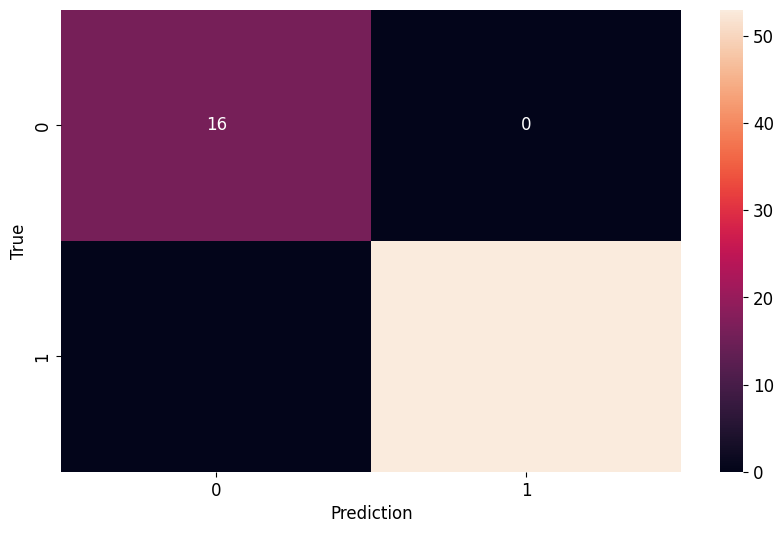

In [107]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('True')

In [108]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[16  0]
 [ 0 53]]

True Positives(TP) =  16

True Negatives(TN) =  53

False Positives(FP) =  0

False Negatives(FN) =  0


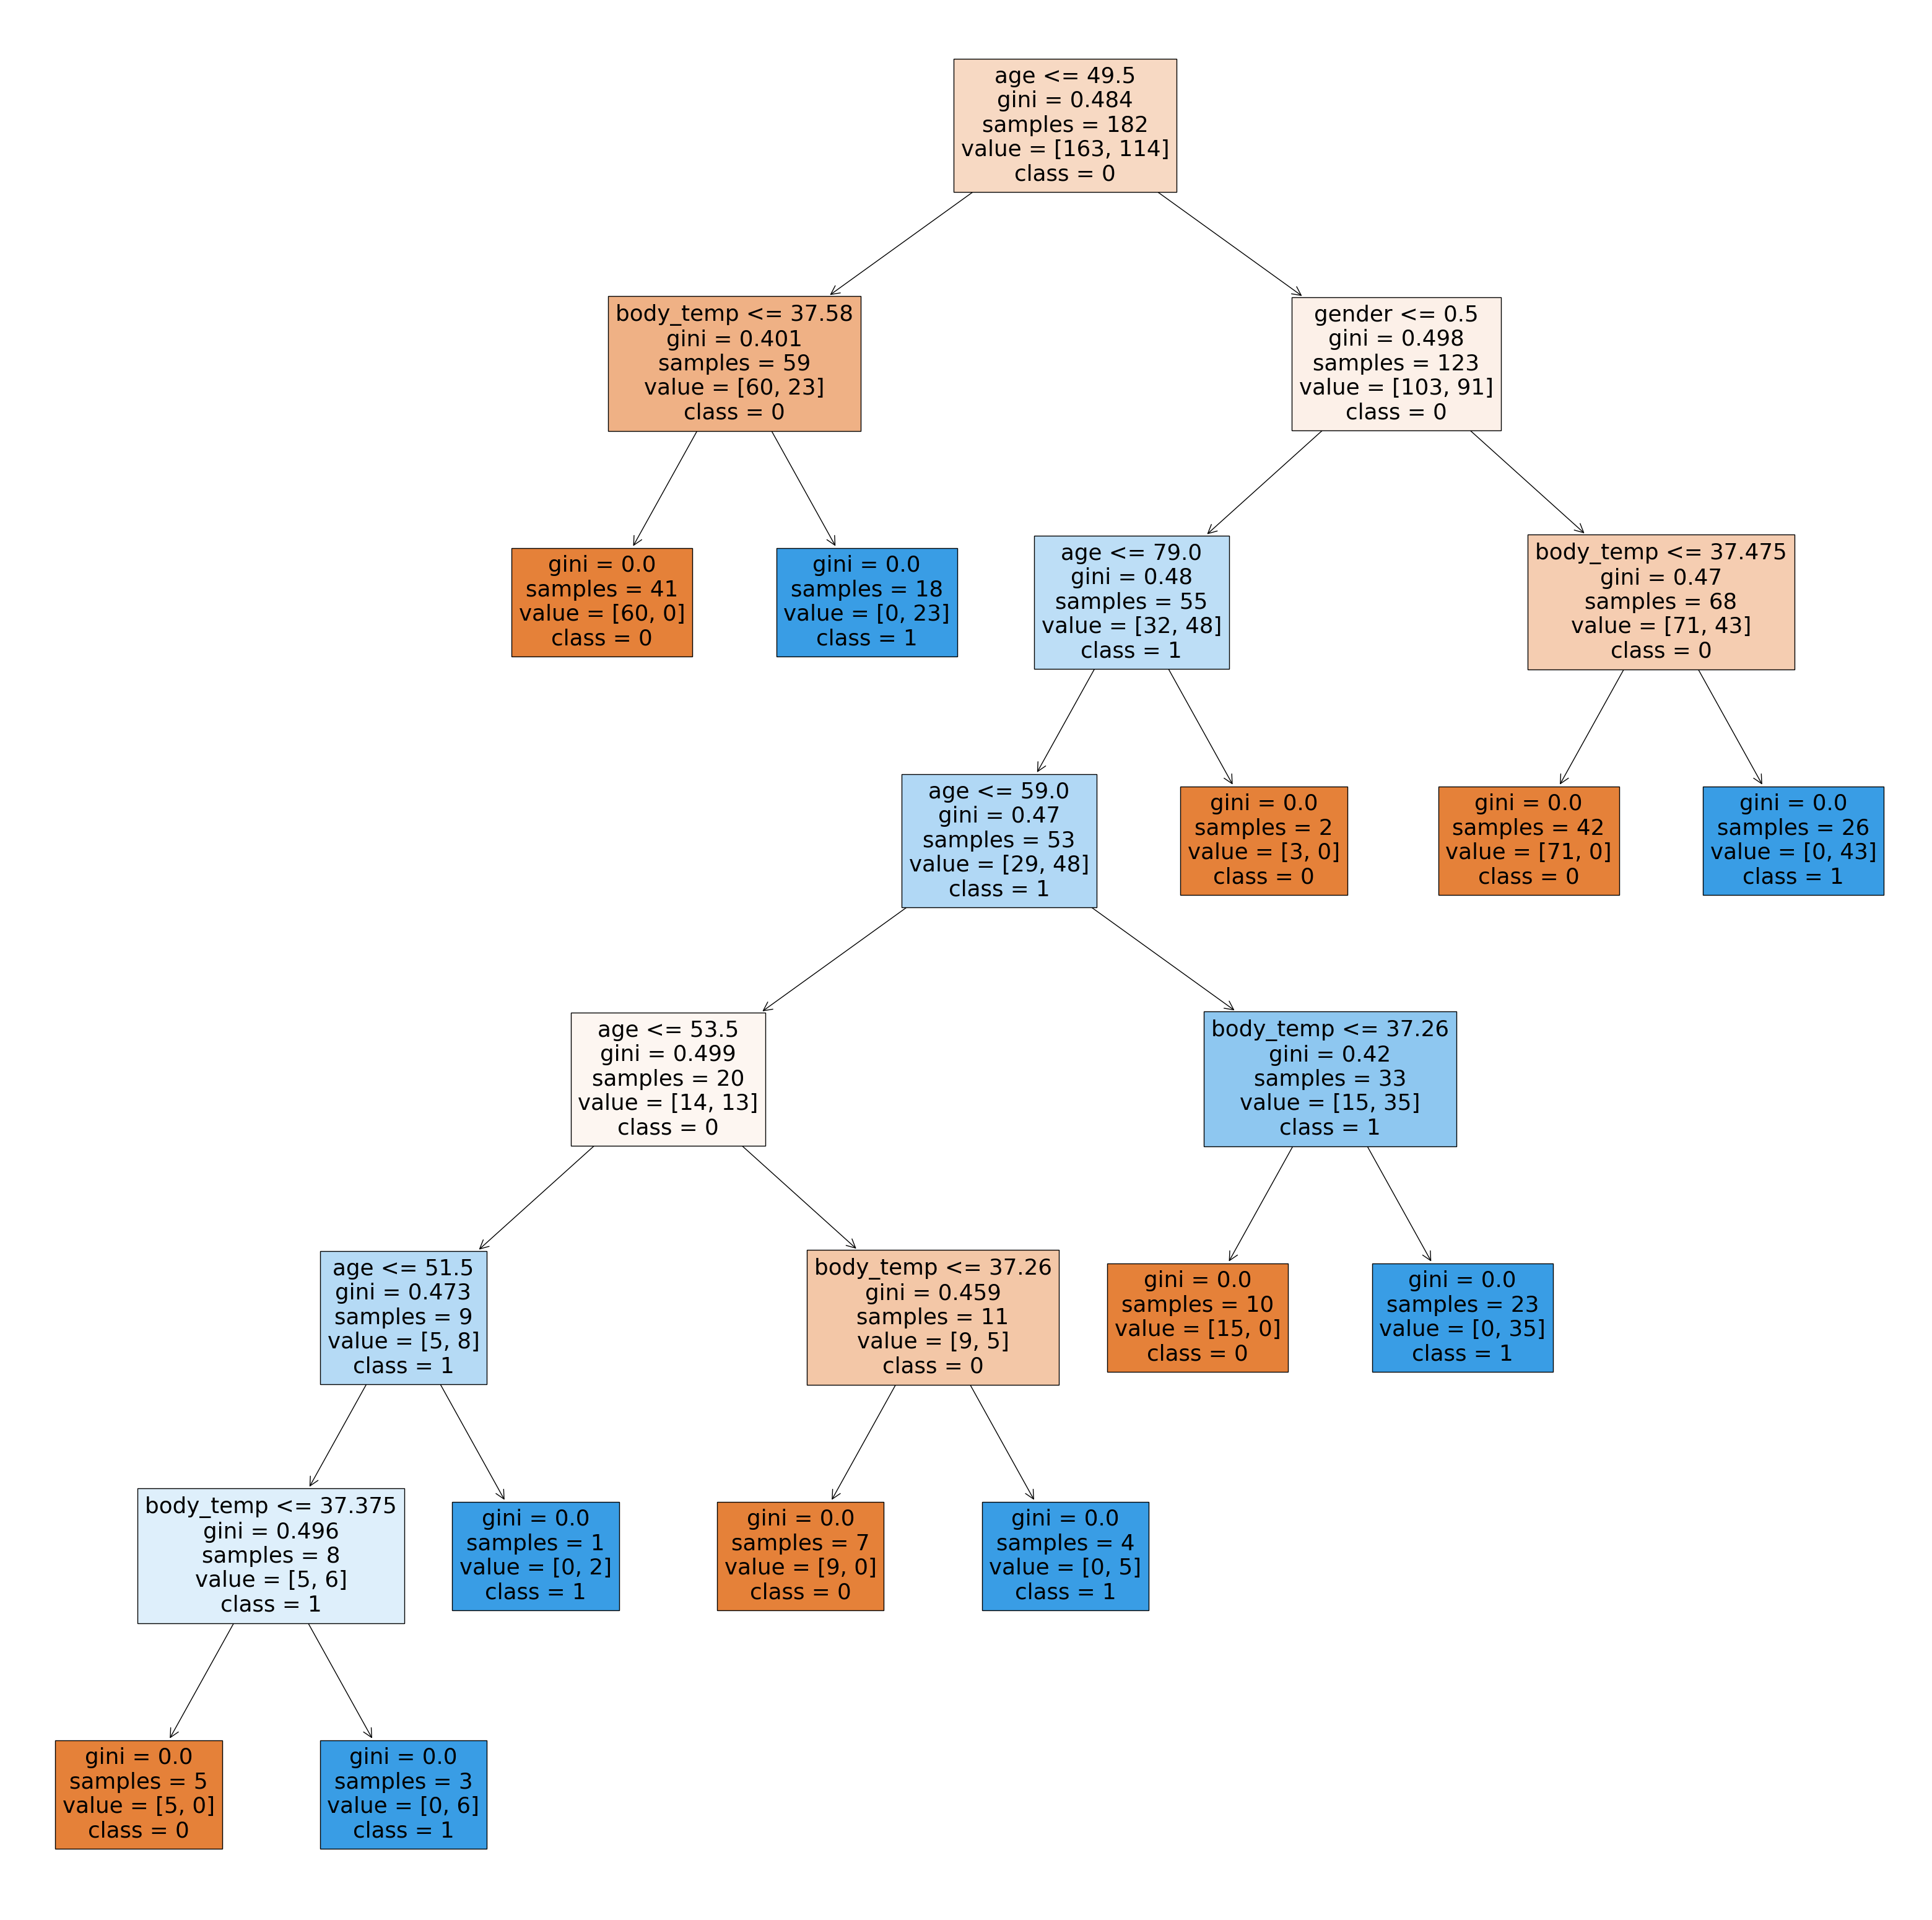

In [109]:
#Se viualiza de forma gráfica la estimación del bosque aleatorio mediante
#un árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(model.estimators_[3], feature_names = X_train.columns,class_names=["0", "1"],filled=True);

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'body_temp'}>, <Axes: >]], dtype=object)

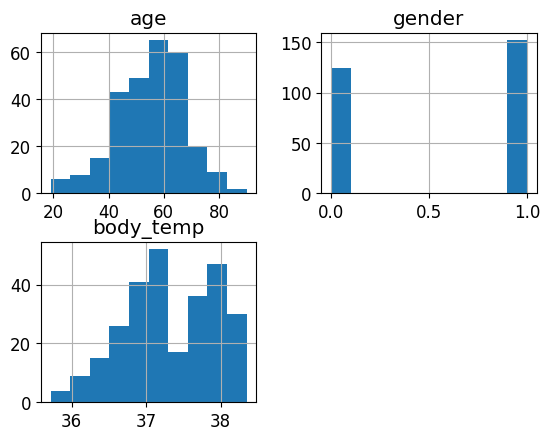

In [110]:
%matplotlib inline
X_train.hist()

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        53

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [112]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [113]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [114]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [115]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [116]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [117]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [118]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


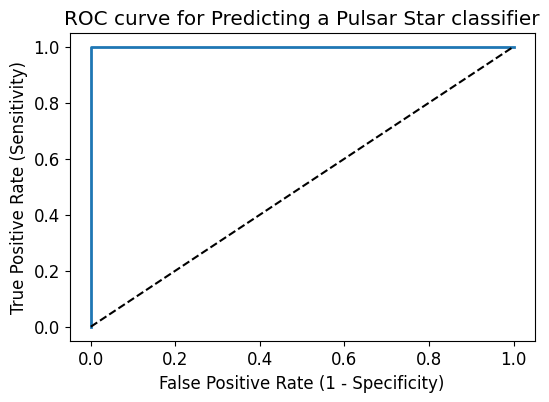

In [119]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [120]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_predicted)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


In [121]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 1.0000


In [122]:
temp.corr()

,age,gender,body_temp,target
age,1.000000,0.023808,0.126790,0.122481
gender,0.023808,1.000000,-0.003052,-0.139125
body_temp,0.126790,-0.003052,1.000000,0.872230
target,0.122481,-0.139125,0.872230,1.000000


                age    gender  body_temp    target
age        1.000000  0.023808   0.126790  0.122481
gender     0.023808  1.000000  -0.003052 -0.139125
body_temp  0.126790 -0.003052   1.000000  0.872230
target     0.122481 -0.139125   0.872230  1.000000
Matrix de correlacion


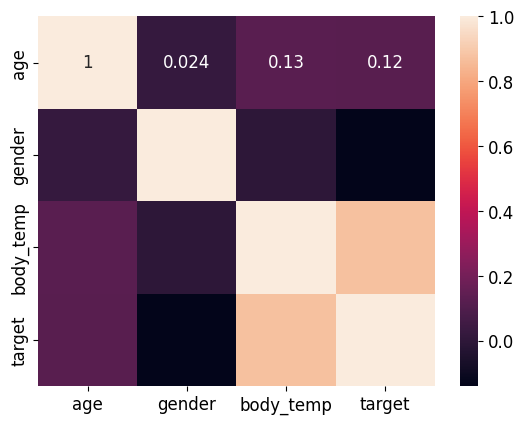

In [123]:
import seaborn as sn
correlation_matrix= temp.corr()
print(correlation_matrix)
sn.heatmap(correlation_matrix, annot=True)
print('Matrix de correlacion')
plt.show()



In [124]:
import numpy as np
covMatrix=temp.cov()
print (covMatrix)


                  age    gender  body_temp    target
age        157.716646  0.148496   0.957601  0.770194
gender       0.148496  0.246670  -0.000912 -0.034598
body_temp    0.957601 -0.000912   0.361677  0.262653
target       0.770194 -0.034598   0.262653  0.250716


<Axes: >

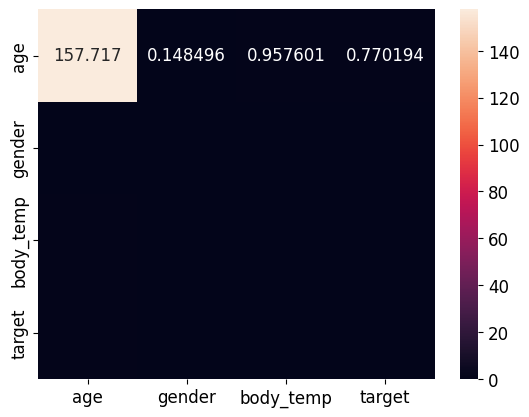

In [125]:
sn.heatmap(covMatrix, annot=True, fmt='g')